In [1]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
boston_df=pd.read_csv('BostonHousing.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#independent features
X=boston_df.iloc[:,:-1]
#dependent features
y=boston_df.iloc[:,-1]

In [5]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [6]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
X_train=scaler.fit_transform(X_train)

In [8]:
X_test=scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [10]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [11]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [14]:
np.mean(mse)

-25.473094575615953

In [15]:
##prediction 
reg_pred=regression.predict(X_test)

In [16]:
reg_pred

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

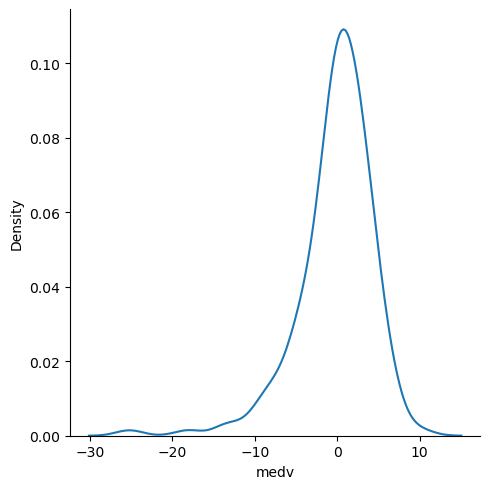

In [17]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [18]:
from sklearn.metrics import r2_score

In [19]:
score=r2_score(reg_pred,y_test)

In [20]:
score

0.6709558976744416

#### Ridge Regression Algorithm

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [22]:
ridge_regressor=Ridge()

In [23]:
ridge_regressor

Ridge()

In [24]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [25]:
print(ridgecv.best_params_)

{'alpha': 5}


In [26]:
print(ridgecv.best_score_)

-25.107805404491778


In [27]:
ridge_pred=ridgecv.predict(X_test)

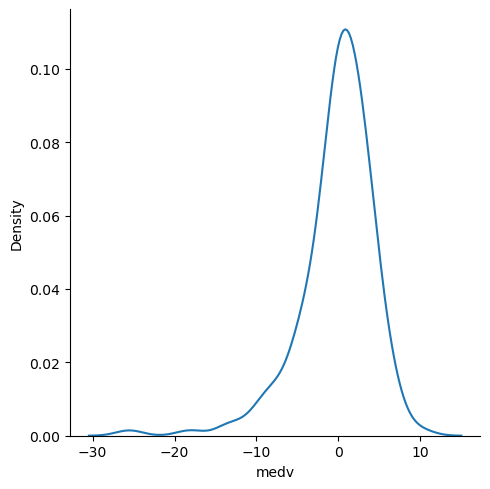

In [28]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [29]:
score=r2_score(ridge_pred,y_test)

In [30]:
score

0.6588722959522684

#### Lasso Regression Algorithm

In [31]:
from sklearn.linear_model import Lasso

In [32]:
lasso=Lasso()

In [33]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [34]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-30.317155919321323


In [35]:
lasso_pred=lassocv.predict(X_test)

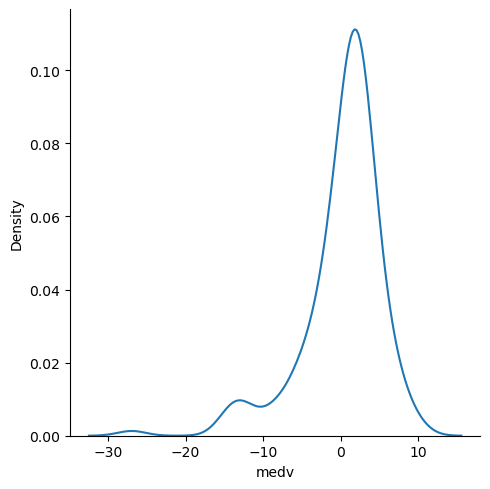

In [36]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')